## Задание

1. Прочитайте базу my_PJME_MW.csv и сделайте ее перерасчет (ресемплинг) в представление по неделям.
2. Постройте модель предсказания 4-й точки от текущей (h = 4), используя результаты автокорреляционного анализа из предшествующих уроков .
3. Постройте модель предсказания 1-й точки от текущей (h = 1), используя результаты автокорреляционного анализа из предшествующих уроков.
4. Примените авторекурсию и сравните результат в 4-й точке путем прямого моделирования и путем рекурсивного моделирования на длине выборки из 4-х точек.
5. Оцените рост ошибки прогнозирования рекурсивной модели в интервалах от 1-й до 10-й, от 10-й до 20-й, от 20-й до 30-й, .. .10i-й до (i+1)10 -й,... ,от 90 до 100-й точках (используйте осреднение по десяткам точек)
6. Сделайте вывод о том, как изменилось поведение ошибки предсказания ряда

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns

#from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
#from sklearn.manifold import TSNE 

from sklearn.metrics import mean_squared_error
import os

In [36]:
#Path_Energy = 'PJME_hourly.csv'
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])


In [37]:
data = data.resample('d').mean()

In [38]:
data = data.resample('w').agg({'PJME_MW':'mean', 'year':'max', 'month':'max', 'quarter':'max', 'weekofyear':'max', 'is_holiday':'sum', \
                               'is_prev_holiday':'sum', 'is_next_holiday':'sum'})

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 866 entries, 2002-01-06 to 2018-08-05
Freq: W-SUN
Data columns (total 8 columns):
PJME_MW            866 non-null float64
year               866 non-null float64
month              866 non-null float64
quarter            866 non-null float64
weekofyear         866 non-null float64
is_holiday         866 non-null float64
is_prev_holiday    866 non-null float64
is_next_holiday    866 non-null float64
dtypes: float64(8)
memory usage: 100.9 KB


In [40]:
#импорт модулей для формирования модели
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

### Добавление признаков

In [41]:
def make_diff(df, src_name, n, trg_name):
    df[trg_name] = 0.0
    df[trg_name].values[n:] = df[src_name].values[n:] - df[src_name].values[n-1:-1]
    

In [42]:
def add_shifted(df, src_name, n, pref):
    trg_name = f'{pref}_{n}'
    df[trg_name] = 0.0
    df[trg_name].values[n:] = df[src_name].values[:-n]

In [115]:
#data = data.drop(columns=['t_1', 't_2'])

In [43]:
make_diff(data, 'PJME_MW', 1, 'diff1')
make_diff(data, 'diff1', 2, 'diff2')

In [44]:
%%time
p = 52
for i in range(p):
    add_shifted(data, 'PJME_MW', i+1, 't')
for i in range(p):
    add_shifted(data, 'diff1', i+1, 'd1')
for i in range(p):
    add_shifted(data, 'diff2', i+1, 'd2')

Wall time: 95.7 ms


In [20]:
data.to_csv('qq.csv', sep=';', encoding='cp1251')

### Селекция

In [45]:
scl_target=StandardScaler() 

h=4
target = data['PJME_MW'].values[p+h:].reshape((data.shape[0]-h-p,1))
y = scl_target.fit_transform(target)
y.shape

(810, 1)

In [46]:
scl_x=StandardScaler() 

X_data = data.iloc[p:-h,:].values
X = scl_x.fit_transform(X_data.astype('float64'))
X.shape

(810, 166)

In [50]:
#X_data[:,0]

In [51]:
#target

In [28]:
from sklearn.feature_selection import f_regression, mutual_info_regression

f_test, q = f_regression(X, y.ravel())
f_test /= np.max(f_test)
for i in range(X.shape[1]):
    print("F-test={:.2f}, I={}".format(f_test[i], i))

F-test=1.00, I=0
F-test=0.01, I=1
F-test=0.00, I=2
F-test=0.00, I=3
F-test=0.00, I=4
F-test=0.00, I=5
F-test=0.00, I=6
F-test=0.00, I=7
F-test=0.02, I=8
F-test=0.00, I=9
F-test=0.51, I=10
F-test=0.29, I=11
F-test=0.15, I=12
F-test=0.06, I=13
F-test=0.02, I=14
F-test=0.00, I=15
F-test=0.01, I=16
F-test=0.06, I=17
F-test=0.13, I=18
F-test=0.19, I=19
F-test=0.27, I=20
F-test=0.29, I=21
F-test=0.27, I=22
F-test=0.21, I=23
F-test=0.14, I=24
F-test=0.08, I=25
F-test=0.03, I=26
F-test=0.00, I=27
F-test=0.00, I=28
F-test=0.02, I=29
F-test=0.05, I=30
F-test=0.11, I=31
F-test=0.18, I=32
F-test=0.25, I=33
F-test=0.27, I=34
F-test=0.25, I=35
F-test=0.19, I=36
F-test=0.13, I=37
F-test=0.07, I=38
F-test=0.02, I=39
F-test=0.00, I=40
F-test=0.00, I=41
F-test=0.03, I=42
F-test=0.08, I=43
F-test=0.15, I=44
F-test=0.24, I=45
F-test=0.32, I=46
F-test=0.33, I=47
F-test=0.28, I=48
F-test=0.23, I=49
F-test=0.14, I=50
F-test=0.08, I=51
F-test=0.02, I=52
F-test=0.00, I=53
F-test=0.01, I=54
F-test=0.04, I=55
F-

In [66]:
data.columns[113] #113

'd1_52'

#### => вторые разности не дают корреляции, влияние календарных фич также исчезающе мало

уберем их

In [120]:
X = X[:, 10:113]

In [68]:
X.shape

(810, 113)

In [53]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import GradientBoostingRegressor

In [83]:
sfk =SelectKBest(f_regression, k=5)
X_new1 =sfk.fit_transform(X, y.ravel())
X_new1.shape

(810, 5)

In [84]:
column_names = data.drop(columns=['PJME_MW']).columns[sfk.get_support()]
column_names

Index(['t_46', 't_47', 't_48', 't_49', 't_50'], dtype='object')

In [85]:
sfp=SelectPercentile(f_regression, percentile=10)
X_new2 = sfp.fit_transform(X, y.ravel())
X_new2.shape

(810, 17)

In [86]:
column_namesp = data.drop(columns=['PJME_MW']).columns[sfp.get_support()]
column_namesp

Index(['t_8', 't_9', 't_10', 't_21', 't_22', 't_23', 't_33', 't_34', 't_35',
       't_36', 't_37', 't_45', 't_46', 't_47', 't_48', 't_49', 't_50'],
      dtype='object')

In [87]:
gr_model = GradientBoostingRegressor(max_depth=5, random_state=40, n_estimators=100).fit(X, y.ravel())
sfm = SelectFromModel(gr_model,  max_features = 5)

sfm.fit(X, y.ravel())
X_new3 = sfm.transform(X)
X_new3.shape

(810, 5)

In [88]:
column_namesf = data.drop(columns=['PJME_MW']).columns[sfm.get_support()]
column_namesf

Index(['t_22', 't_23', 't_34', 't_48', 't_49'], dtype='object')

In [89]:
list_param_k =np.where(sfk.get_support())[0]
list_param_p =np.where(sfp.get_support())[0]
list_param_m =np.where(sfm.get_support())[0]

print('Номера признаков k лучших признаков : ',list_param_k)
print('Номера признаков лучших признаков по процентной форме: ',list_param_p)
print('Номера признаков для выбора по модели : ',list_param_m)

Номера признаков k лучших признаков :  [54 55 56 57 58]
Номера признаков лучших признаков по процентной форме:  [16 17 18 29 30 31 41 42 43 44 45 53 54 55 56 57 58]
Номера признаков для выбора по модели :  [30 31 42 56 57]


In [90]:
list_param_p

array([16, 17, 18, 29, 30, 31, 41, 42, 43, 44, 45, 53, 54, 55, 56, 57, 58],
      dtype=int64)

In [91]:
list_par=[16, 17, 18, 29, 30, 31, 41, 42, 43, 44, 45, 53, 54, 55, 56, 57, 58]
#[7, 9, 10, 19, 20, 21, 32, 33, 34, 44, 45, 46, 47, 48, 57, 58, 59, 60]
X_new = X[:,list_par]
data.drop(columns=['PJME_MW']).columns[list_par]

Index(['t_8', 't_9', 't_10', 't_21', 't_22', 't_23', 't_33', 't_34', 't_35',
       't_36', 't_37', 't_45', 't_46', 't_47', 't_48', 't_49', 't_50'],
      dtype='object')

###  Будем использовать 103 фичи после отсева 2-х разностей 

In [141]:
# сделаем функцию
def split_data( data, split_date ):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()

In [142]:
train, test = split_data( data, '01-06-2016')

In [126]:
model_g = GradientBoostingRegressor(max_depth=5, random_state=0, n_estimators=100)

In [146]:
def do_gb_predict(df, h):
    if not h>0:
        print('the predict does not allow data leakage')
        return 1
    
    target = data['PJME_MW'].values[p+h:].reshape((data.shape[0]-h-p,1))
    y = target  #scl_target.fit_transform(target)
    
    X_data = data.iloc[p:-h,:113].values
    X = scl_x.fit_transform(X_data.astype('float64'))
    
    X_train =X[:train.shape[0],:]
    y_train =y[:train.shape[0]].ravel()
    X_test =X[train.shape[0]:,:]
    y_test =y[train.shape[0]:].ravel()
    
    model_g.fit( X_train, y_train )
    
    y_pred = model_g.predict(X_test)
    
    return y_test, y_pred

In [112]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [155]:
h = 1
y, y_pred = do_gb_predict(data, h)

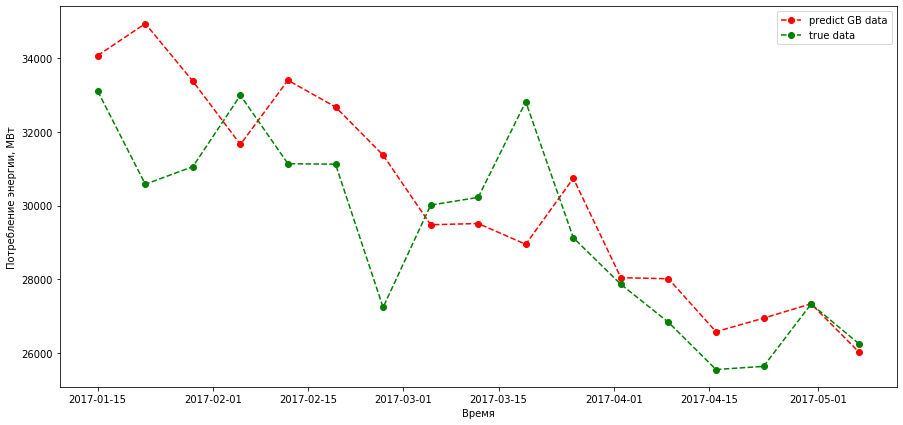

In [156]:
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[p+h:70], y_pred[:70-h-p], '--or', label='predict GB data' )
plt.plot(test.index[p+h:70], y[:70-h-p], '--og', label='true data')

plt.legend()
plt.show()

In [157]:
er_g = mean_absolute_percentage_error(y,y_pred )

print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   6.1064072479953735 %


In [158]:
h = 4
y, y_pred = do_gb_predict(data, h)

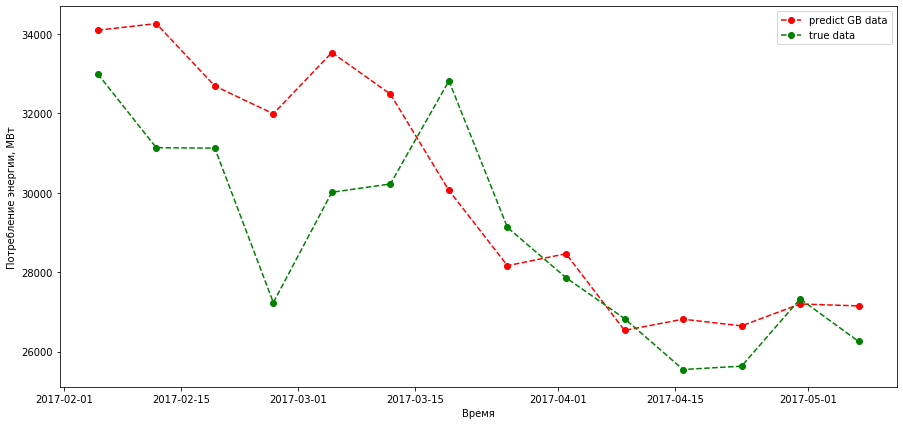

In [159]:
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('Потребление энергии, МВт')
plt.plot(test.index[p+h:70], y_pred[:70-h-p], '--or', label='predict GB data' )
plt.plot(test.index[p+h:70], y[:70-h-p], '--og', label='true data')

plt.legend()
plt.show()

In [160]:
er_g = mean_absolute_percentage_error(y,y_pred )

print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   6.322490703528882 %


,PJME_MW,year,month,quarter,weekofyear,is_holiday,is_prev_holiday,is_next_holiday,diff1,diff2
Date,,,,,,,,,,
2002-01-06,32383.053744,2002.0,1.0,1.0,1.0,1.0,0.0,1.0,0.000000,0.000000
2002-01-13,31487.386905,2002.0,1.0,1.0,2.0,0.0,0.0,0.0,-895.666839,0.000000
2002-01-20,31452.880952,2002.0,1.0,1.0,3.0,0.0,1.0,0.0,-34.505952,861.160887
2002-01-27,30141.529762,2002.0,1.0,1.0,4.0,1.0,0.0,1.0,-1311.351190,-1276.845238
2002-02-03,29196.488095,2002.0,2.0,1.0,5.0,0.0,0.0,0.0,-945.041667,366.309524


In [11]:
h=1
target = data['PJME_MW'].values[h:].reshape((data.shape[0]-h,1))
target.shape

(865, 1)

In [ ]:
X = data_d.iloc[0:-h,:].values

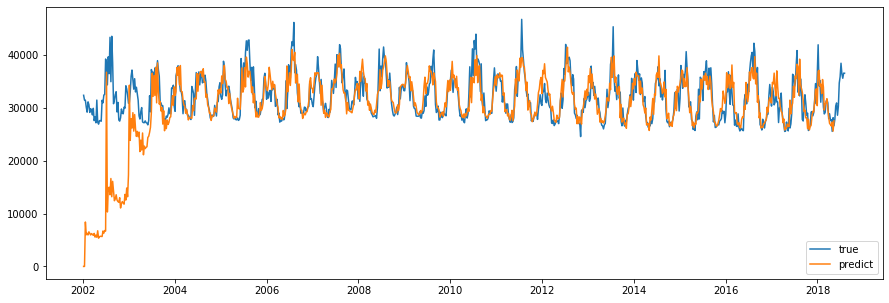

In [50]:
plt.rcParams['figure.figsize'] = (15, 5)
x1 = data['PJME_MW'].values
x2 = results_opt.predict()
plt.plot(data.index, x1, label='true')
plt.plot(data.index[:-12], x2, label='predict')
plt.legend()
plt.show()

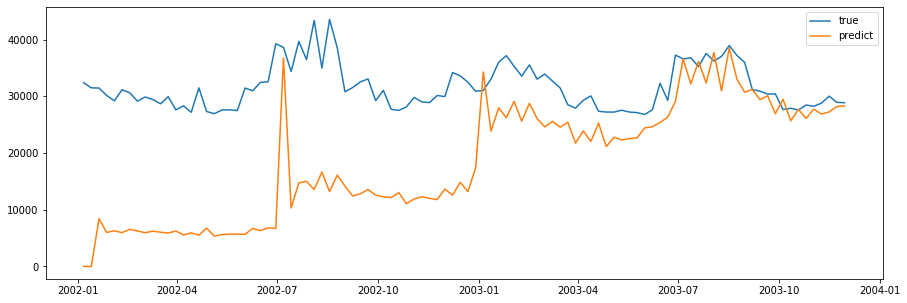

In [51]:
plt.plot(data.index[:100], x1[:100], label='true')
plt.plot(data.index[:100], x2[:100], label='predict')
plt.legend()
plt.show()

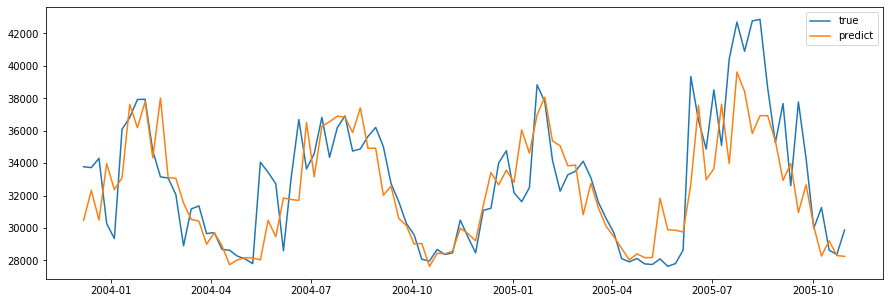

In [52]:
plt.plot(data.index[100:200], x1[100:200], label='true')
plt.plot(data.index[100:200], x2[100:200], label='predict')
plt.legend()
plt.show()

In [53]:
?results_opt.predict

In [138]:
a=5
b=6
a*b

30